## Incluir nomes

In [1]:
import pandas as pd

In [2]:
nomes_m = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m')
nomes_f = pd.read_json('https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f')

In [3]:
print("Quantidade de nomes -> " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes -> 400


In [4]:
nomes = pd.concat( [nomes_f, nomes_m] )['nome'].to_frame()

In [5]:
nomes.sample(5)

,nome
68,CAIO
43,TEREZINHA
144,VINICIOS
139,MARGARIDA
153,CAUA


## Incluir IDs dos Alunos

In [6]:
import numpy as np

In [7]:
np.random.seed(123)

In [8]:
nomes['id_nome'] = np.random.permutation(len(nomes)) + 1

In [9]:
dominios = ['@dominiodoemail.com.br', '@servicodoemail.com']
nomes['dominio'] = np.random.choice( dominios, len(nomes) )

In [10]:
nomes['email'] = nomes.nome.str.cat(nomes['dominio']).str.lower()

In [11]:
nomes.sample(5)

,nome,id_nome,dominio,email
46,FABIANA,358,@servicodoemail.com,fabiana@servicodoemail.com
38,DIEGO,294,@dominiodoemail.com.br,diego@dominiodoemail.com.br
136,NILTON,271,@dominiodoemail.com.br,nilton@dominiodoemail.com.br
119,MOISES,4,@servicodoemail.com,moises@servicodoemail.com
101,GISELE,298,@servicodoemail.com,gisele@servicodoemail.com


## Criando tabela Cursos

In [12]:
!pip3 install html5lib 
!pip3 install lxml

In [13]:
import html5lib as html

In [14]:
url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

In [15]:
type(cursos)

list

In [16]:
cursos = cursos[0]

In [17]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


## Alterando Index do Data Frame

In [18]:
cursos.rename(columns={ 'Nome do curso': 'nome_do_curso' }, inplace= True)

In [19]:
cursos['id'] = cursos.index + 1

In [20]:
cursos.set_index('id', inplace=True)

In [21]:
cursos

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


## Matriculando alunos nos Cursos

In [22]:
nomes['matriculas'] = np.ceil( np.random.exponential( size = len(nomes)) * 1.5 ).astype(int)

In [23]:
nomes.matriculas.describe()

count    400.000000
mean       1.920000
std        1.460799
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

In [24]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


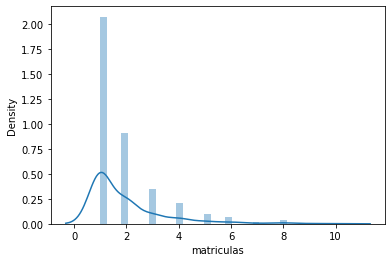

In [25]:
sns.distplot(nomes.matriculas)

In [26]:
nomes.matriculas.value_counts()

1     220
2      96
3      37
4      22
5      10
6       7
8       4
7       2
10      1
9       1
Name: matriculas, dtype: int64

## Selecionando Cursos

In [27]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

In [28]:
for index, row in nomes.iterrows():
  id = row.id_nome 
  matriculas = row.matriculas
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])

In [29]:
matriculas.head(10)

,id_aluno,id_curso
0,235,14
1,43,7
2,43,16
3,43,8
4,43,18
5,304,20
6,304,1
7,304,20
8,304,10
9,304,12


In [30]:
matriculas.groupby('id_curso').count().join((cursos.nome_do_curso)).rename(columns={'id_aluno': 'quantidade_de_alunos'})

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,24,Lógica de programação
2,7,Java para Web
3,1,C# para Web
4,22,Ruby on Rails
5,63,Cursos de Python
6,22,PHP com MySql
7,57,.NET para web
8,55,Novas integrações com Java
9,1,TDD com Java


In [31]:
nomes.sample(10)

,nome,id_nome,dominio,email,matriculas
159,ARNALDO,359,@dominiodoemail.com.br,arnaldo@dominiodoemail.com.br,1
144,LORENA,91,@dominiodoemail.com.br,lorena@dominiodoemail.com.br,7
137,AUGUSTO,376,@servicodoemail.com,augusto@servicodoemail.com,1
62,VICTOR,216,@servicodoemail.com,victor@servicodoemail.com,4
199,NILZA,35,@dominiodoemail.com.br,nilza@dominiodoemail.com.br,1
138,NEUSA,75,@dominiodoemail.com.br,neusa@dominiodoemail.com.br,2
53,RONALDO,356,@servicodoemail.com,ronaldo@servicodoemail.com,1
124,CESAR,2,@dominiodoemail.com.br,cesar@dominiodoemail.com.br,2
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
197,LUCIANE,50,@servicodoemail.com,luciane@servicodoemail.com,1


In [32]:
cursos.head(10)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql
7,.NET para web
8,Novas integrações com Java
9,TDD com Java


In [33]:
matriculas.sample(10)

,id_aluno,id_curso
99,249,6
685,354,8
74,297,19
101,27,15
496,239,20
133,212,1
622,374,19
659,326,19
94,241,8
413,101,6


In [34]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join((cursos.nome_do_curso)).rename(columns={'id_aluno': 'quantidade_de_alunos'})

In [35]:
matriculas_por_curso.sample(10)

,quantidade_de_alunos,nome_do_curso
id_curso,,
10,57,Código limpo com C#
2,7,Java para Web
19,84,Boas práticas em Java
3,1,C# para Web
7,57,.NET para web
6,22,PHP com MySql
8,55,Novas integrações com Java
17,61,Internet das coisas
14,62,Desenvolvendo jogos


# Saída em Diferentes Formatos

In [36]:
matriculas_por_curso.to_csv('matriculas_por_cursos.csv', sep=';', index=False)

In [37]:
matriculas_json = matriculas_por_curso.to_json()

In [38]:
matriculas_html = matriculas_por_curso.to_html()

In [39]:
print(matriculas_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>quantidade_de_alunos</th>
      <th>nome_do_curso</th>
    </tr>
    <tr>
      <th>id_curso</th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>24</td>
      <td>Lógica de programação</td>
    </tr>
    <tr>
      <th>2</th>
      <td>7</td>
      <td>Java para Web</td>
    </tr>
    <tr>
      <th>3</th>
      <td>1</td>
      <td>C# para Web</td>
    </tr>
    <tr>
      <th>4</th>
      <td>22</td>
      <td>Ruby on Rails</td>
    </tr>
    <tr>
      <th>5</th>
      <td>63</td>
      <td>Cursos de Python</td>
    </tr>
    <tr>
      <th>6</th>
      <td>22</td>
      <td>PHP com MySql</td>
    </tr>
    <tr>
      <th>7</th>
      <td>57</td>
      <td>.NET para web</td>
    </tr>
    <tr>
      <th>8</th>
      <td>55</td>
      <td>Novas integrações com Java</td>
    </tr>
    <tr>
      <th>9</th>
      <td>1</td>
   

#Criando BD SQL

In [40]:
!pip install sqlalchemy

In [41]:
from sqlalchemy import  create_engine, MetaData, Table

In [42]:
engine = create_engine('sqlite:///:memory:')

In [43]:
#Guardando em BD os dados
matriculas_por_curso.to_sql('matriculas', engine)

In [44]:
print(engine.table_names())

['matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  """Entry point for launching an IPython kernel.


#Buscando em Banco de Dados

In [45]:
query = 'select * from matriculas where quantidade_de_alunos < 20'

In [46]:
pd.read_sql(query, engine)

,id_curso,quantidade_de_alunos,nome_do_curso
0,2,7,Java para Web
1,3,1,C# para Web
2,9,1,TDD com Java
3,11,11,Preparatório para certificação Java
4,13,14,Persistência com .NET
5,16,18,Estatística básica


In [47]:
#Consultar em BD mudando ordem das colunas
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'quantidade_de_alunos'])

In [48]:
#Filtrar / Query em dentro do pandas
muitas_matriculas.query('quantidade_de_alunos > 60')

,nome_do_curso,quantidade_de_alunos
4,Cursos de Python,63
13,Desenvolvendo jogos,62
14,Análise de dados,68
16,Internet das coisas,61
18,Boas práticas em Java,84


#Escrevendo no Banco

In [49]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine)

In [50]:
#Relação de tabelas
print(engine.table_names())

['matriculas', 'muitas_matriculas']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  


#Nome dos alunos da próximas turmas

In [51]:
matriculas_por_curso.head(20)

,quantidade_de_alunos,nome_do_curso
id_curso,,
1,24,Lógica de programação
2,7,Java para Web
3,1,C# para Web
4,22,Ruby on Rails
5,63,Cursos de Python
6,22,PHP com MySql
7,57,.NET para web
8,55,Novas integrações com Java
9,1,TDD com Java


In [52]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
2,43,16
22,217,16
28,163,16
43,173,16
72,76,16
112,14,16
170,253,16
211,145,16
362,319,16
418,400,16


In [53]:
nomes.sample(3)

,nome,id_nome,dominio,email,matriculas
15,LETICIA,347,@servicodoemail.com,leticia@servicodoemail.com,1
187,NAIARA,229,@dominiodoemail.com.br,naiara@dominiodoemail.com.br,2
104,EVA,13,@servicodoemail.com,eva@servicodoemail.com,1


In [54]:
#Renomear coluna da tabel
nomes.rename(columns={'id_nome': 'id_aluno'}, inplace=True)
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,1
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,4
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,5
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,3
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,1
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,1


In [55]:
# Join de tabelas
#proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))
#proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome']
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame()

In [56]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [57]:
nome_curso = nome_curso.nome_do_curso

In [58]:
proxima_turma.rename(columns={'nome':'Alunos do Curso de {}'.format(nome_curso)}, inplace=True)

In [59]:
proxima_turma.sample(10)

,Alunos do Curso de Estatística básica
id_aluno,
43,ANA
44,NICOLAS
217,AMANDA
14,SUELI
215,WESLEI
159,ORLANDO
169,GERSON
255,WESLEY
283,CAIO


#Excel

In [61]:
proxima_turma.to_excel('proxima_turma.xlsx', index=False)

In [62]:
pd.read_excel('proxima_turma.xlsx')

,Alunos do Curso de Estatística básica
0,ANA
1,AMANDA
2,LUCIANA
3,LARISSA
4,JAQUELINE
5,SUELI
6,MICHELE
7,KATIA
8,INES
9,FABIO
